In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import skimage
from glob import glob
import os, shutil

In [2]:
dir_list = glob('data/*')
for dir in dir_list:
    for files in os.listdir(dir):
        path = os.path.join(dir, files)
        try:
            shutil.rmtree(path)
        except OSError:
            os.remove(path)
            

In [3]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('/hw3/data.zip')
fantasy_zip.extractall('/hw3/data/')
 
fantasy_zip.close()            

In [4]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
        else :
            for files in os.listdir(directory):
                path = os.path.join(directory, files)
                try:
                    shutil.rmtree(path)
                except OSError:
                    os.remove(path)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

file_path = 'data/shortaxis_n=200_jet/'
png_list = glob('data/shortaxis_n=200/' + '*.png')
img_list = []
img_gray_list = []
img_jet_list = []
createFolder(file_path)

In [5]:
for jj, ffname in enumerate(png_list):
    img = imageio.imread(ffname)
    img_src = skimage.transform.resize(img, (128, 128), anti_aliasing=True, preserve_range=False)
    img_list.append(img_src)

    gray = plt.get_cmap('gray')
    gray_image = gray(img_src)

    jet = plt.get_cmap('jet')
    jet_image = jet(img_src)

    img_gray_list.append(gray_image)
    img_jet_list.append(jet_image)

    plt.figure()
    plt.axis('off')
    plt.imshow(jet_image)
    png_list[jj] = (png_list[jj]).replace('data/shortaxis_n=200/', file_path)
    plt.savefig(png_list[jj])
    plt.close()


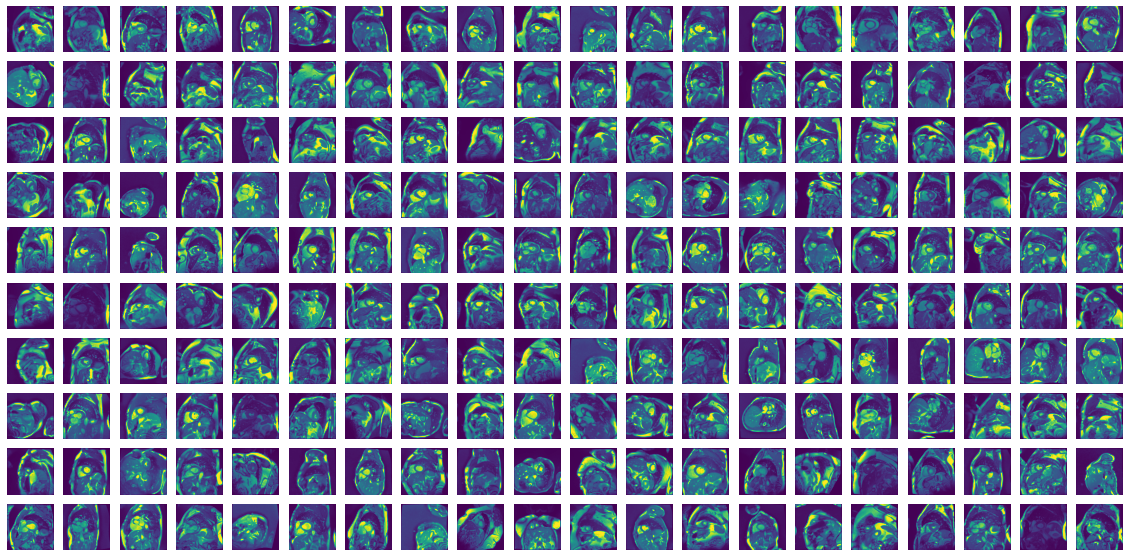

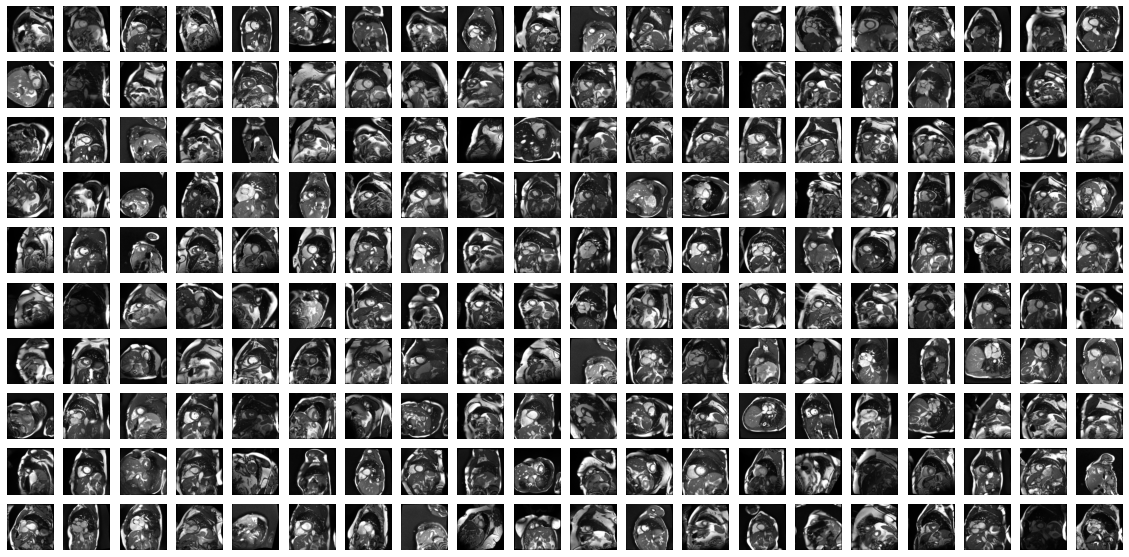

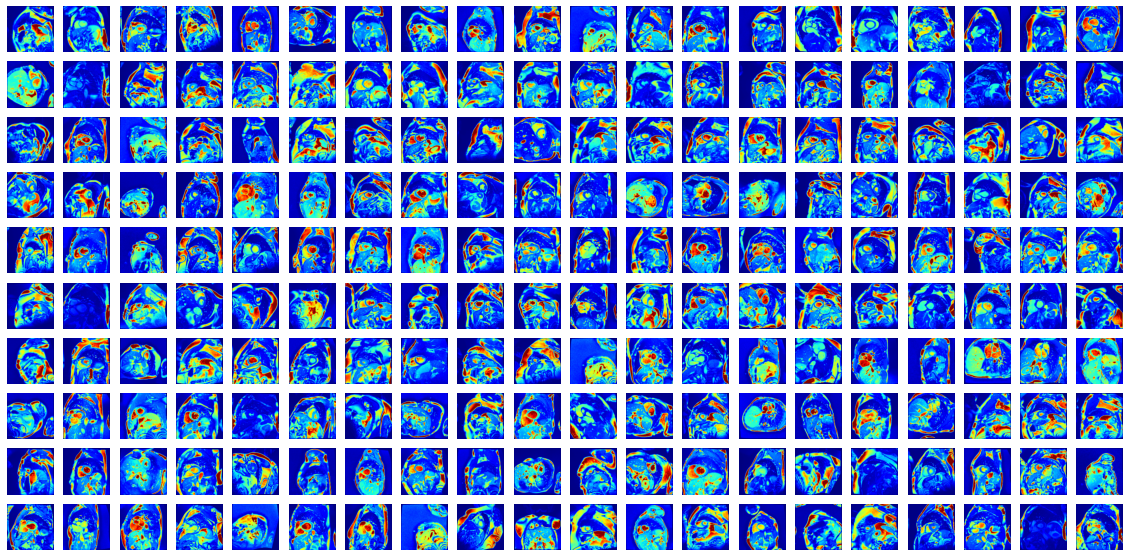

In [6]:

for image_lst in [img_list, img_gray_list, img_jet_list]:
    plt.figure(figsize = (20, 10))
    for index in range(200):
            plt.subplot(10,20, index+1)
            plt.imshow(image_lst[index])
            plt.axis('off')
        
    plt.show()
    plt.close()